In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

In [2]:
#1.
root = 'C:\\Users\\admin\\OneDrive - nyu.edu\\Bootcamp_3'
df = pd.read_csv(root + '\\crosssection_AAPL.csv')
df.head()

,Date1,Time1,Year,Month,Day,Hour,Minute,SYMBOL,BID,OFR,N_OFFER,N_BID
0,20130102,09:30,2013,1,2,9,30,AAPL,553.45,553.63,6953.0,10359.0
1,20130102,09:31,2013,1,2,9,31,AAPL,530.64,552.42,11562.0,11163.0
2,20130102,09:32,2013,1,2,9,32,AAPL,550.84,551.35,7629.0,6001.0
3,20130102,09:33,2013,1,2,9,33,AAPL,551.07,551.60,5306.0,5562.0
4,20130102,09:34,2013,1,2,9,34,AAPL,552.02,552.92,7767.0,9202.0


In [3]:
df.tail()

,Date1,Time1,Year,Month,Day,Hour,Minute,SYMBOL,BID,OFR,N_OFFER,N_BID
98527,20131231,15:56,2013,12,31,15,56,AAPL,561.14,561.21,1577.0,2588.0
98528,20131231,15:57,2013,12,31,15,57,AAPL,560.70,560.77,2540.0,2867.0
98529,20131231,15:58,2013,12,31,15,58,AAPL,560.55,560.60,2837.0,3185.0
98530,20131231,15:59,2013,12,31,15,59,AAPL,560.81,560.98,5891.0,7227.0
98531,20131231,16:00,2013,12,31,16,0,AAPL,561.11,561.19,9063.0,7702.0


In [4]:
df.describe()

,Date1,Year,Month,Day,Hour,Minute,BID,OFR,N_OFFER,N_BID
count,9.853200e+04,98532.0,98532.000000,98532.000000,98532.000000,98532.000000,98193.000000,98193.000000,9.819300e+04,9.819300e+04
mean,2.013067e+07,2013.0,6.543651,15.650794,12.240409,30.575448,471.024906,471.730246,3.481483e+03,3.785667e+03
std,3.427930e+02,0.0,3.426409,8.707200,1.894544,17.326909,51.694662,51.776169,1.694026e+04,2.505565e+04
min,2.013010e+07,2013.0,1.000000,1.000000,9.000000,0.000000,3.880000,3.950000,1.000000e+00,1.000000e+00
25%,2.013040e+07,2013.0,4.000000,8.000000,11.000000,16.000000,435.660000,436.320000,1.231000e+03,1.256000e+03
50%,2.013070e+07,2013.0,7.000000,15.500000,12.000000,32.000000,460.670000,461.290000,2.121000e+03,2.158000e+03
75%,2.013100e+07,2013.0,10.000000,23.000000,14.000000,46.000000,505.160000,506.120000,3.620000e+03,3.718000e+03
max,2.013123e+07,2013.0,12.000000,31.000000,16.000000,59.000000,574.690000,598.000000,1.117690e+06,2.837808e+06


In [5]:
#2.
df.index = pd.to_datetime(df[['Year', 'Month', 'Day','Hour', 'Minute']])
df.head()

,Date1,Time1,Year,Month,Day,Hour,Minute,SYMBOL,BID,OFR,N_OFFER,N_BID
2013-01-02 09:30:00,20130102,09:30,2013,1,2,9,30,AAPL,553.45,553.63,6953.0,10359.0
2013-01-02 09:31:00,20130102,09:31,2013,1,2,9,31,AAPL,530.64,552.42,11562.0,11163.0
2013-01-02 09:32:00,20130102,09:32,2013,1,2,9,32,AAPL,550.84,551.35,7629.0,6001.0
2013-01-02 09:33:00,20130102,09:33,2013,1,2,9,33,AAPL,551.07,551.60,5306.0,5562.0
2013-01-02 09:34:00,20130102,09:34,2013,1,2,9,34,AAPL,552.02,552.92,7767.0,9202.0


In [6]:
#3.
df['AvgPriceAAPL'] = (df['OFR']+df['BID'])/2
df.head()

,Date1,Time1,Year,Month,Day,Hour,Minute,SYMBOL,BID,OFR,N_OFFER,N_BID,AvgPriceAAPL
2013-01-02 09:30:00,20130102,09:30,2013,1,2,9,30,AAPL,553.45,553.63,6953.0,10359.0,553.540
2013-01-02 09:31:00,20130102,09:31,2013,1,2,9,31,AAPL,530.64,552.42,11562.0,11163.0,541.530
2013-01-02 09:32:00,20130102,09:32,2013,1,2,9,32,AAPL,550.84,551.35,7629.0,6001.0,551.095
2013-01-02 09:33:00,20130102,09:33,2013,1,2,9,33,AAPL,551.07,551.60,5306.0,5562.0,551.335
2013-01-02 09:34:00,20130102,09:34,2013,1,2,9,34,AAPL,552.02,552.92,7767.0,9202.0,552.470


In [7]:
#4.
df['RetAAPL0'] = 100*(df['AvgPriceAAPL']).pct_change()
df.head()

,Date1,Time1,Year,Month,Day,Hour,Minute,SYMBOL,BID,OFR,N_OFFER,N_BID,AvgPriceAAPL,RetAAPL0
2013-01-02 09:30:00,20130102,09:30,2013,1,2,9,30,AAPL,553.45,553.63,6953.0,10359.0,553.540,NaN
2013-01-02 09:31:00,20130102,09:31,2013,1,2,9,31,AAPL,530.64,552.42,11562.0,11163.0,541.530,-2.169672
2013-01-02 09:32:00,20130102,09:32,2013,1,2,9,32,AAPL,550.84,551.35,7629.0,6001.0,551.095,1.766292
2013-01-02 09:33:00,20130102,09:33,2013,1,2,9,33,AAPL,551.07,551.60,5306.0,5562.0,551.335,0.043550
2013-01-02 09:34:00,20130102,09:34,2013,1,2,9,34,AAPL,552.02,552.92,7767.0,9202.0,552.470,0.205864


In [8]:
#5.
for i in np.arange(1,6):    
    df['RetAAPL{0}'.format(i)] = df['RetAAPL0'].shift(periods=-i)
df.head()

,Date1,Time1,Year,Month,Day,Hour,Minute,SYMBOL,BID,OFR,N_OFFER,N_BID,AvgPriceAAPL,RetAAPL0,RetAAPL1,RetAAPL2,RetAAPL3,RetAAPL4,RetAAPL5
2013-01-02 09:30:00,20130102,09:30,2013,1,2,9,30,AAPL,553.45,553.63,6953.0,10359.0,553.540,NaN,-2.169672,1.766292,0.043550,0.205864,0.335765
2013-01-02 09:31:00,20130102,09:31,2013,1,2,9,31,AAPL,530.64,552.42,11562.0,11163.0,541.530,-2.169672,1.766292,0.043550,0.205864,0.335765,-0.124476
2013-01-02 09:32:00,20130102,09:32,2013,1,2,9,32,AAPL,550.84,551.35,7629.0,6001.0,551.095,1.766292,0.043550,0.205864,0.335765,-0.124476,-0.048769
2013-01-02 09:33:00,20130102,09:33,2013,1,2,9,33,AAPL,551.07,551.60,5306.0,5562.0,551.335,0.043550,0.205864,0.335765,-0.124476,-0.048769,-0.052407
2013-01-02 09:34:00,20130102,09:34,2013,1,2,9,34,AAPL,552.02,552.92,7767.0,9202.0,552.470,0.205864,0.335765,-0.124476,-0.048769,-0.052407,-0.081363


In [9]:
#6.
df['BASprd'] = 100*(df['OFR']-df['BID'])/(df['OFR']+df['BID'])
df['BAImb'] = 100*(df['N_BID']-df['N_OFFER'])/(df['N_BID']+df['N_OFFER'])
df.head()

,Date1,Time1,Year,Month,Day,Hour,Minute,SYMBOL,BID,OFR,...,N_BID,AvgPriceAAPL,RetAAPL0,RetAAPL1,RetAAPL2,RetAAPL3,RetAAPL4,RetAAPL5,BASprd,BAImb
2013-01-02 09:30:00,20130102,09:30,2013,1,2,9,30,AAPL,553.45,553.63,...,10359.0,553.540,NaN,-2.169672,1.766292,0.043550,0.205864,0.335765,0.016259,19.674214
2013-01-02 09:31:00,20130102,09:31,2013,1,2,9,31,AAPL,530.64,552.42,...,11163.0,541.530,-2.169672,1.766292,0.043550,0.205864,0.335765,-0.124476,2.010969,-1.755776
2013-01-02 09:32:00,20130102,09:32,2013,1,2,9,32,AAPL,550.84,551.35,...,6001.0,551.095,1.766292,0.043550,0.205864,0.335765,-0.124476,-0.048769,0.046272,-11.944241
2013-01-02 09:33:00,20130102,09:33,2013,1,2,9,33,AAPL,551.07,551.60,...,5562.0,551.335,0.043550,0.205864,0.335765,-0.124476,-0.048769,-0.052407,0.048065,2.355539
2013-01-02 09:34:00,20130102,09:34,2013,1,2,9,34,AAPL,552.02,552.92,...,9202.0,552.470,0.205864,0.335765,-0.124476,-0.048769,-0.052407,-0.081363,0.081452,8.456597


In [10]:
#7.
df.dropna(how='any', inplace=True)

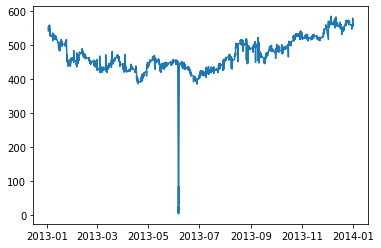

In [11]:
#8.
plt.plot(df['AvgPriceAAPL'])

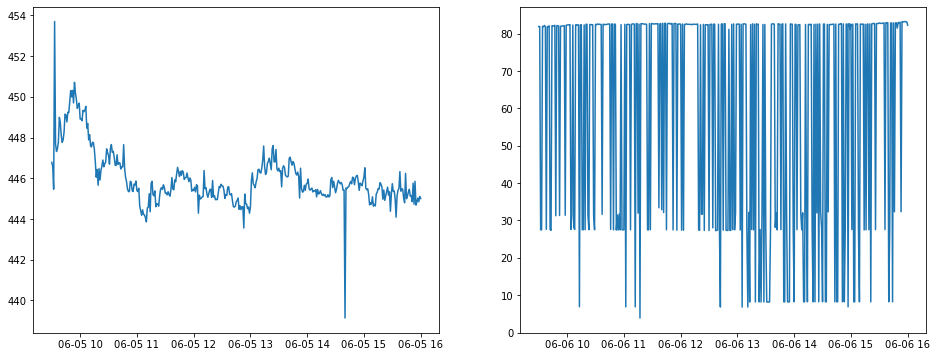

In [12]:
#9.
fig, ax = plt.subplots(1, 2, figsize = (16,6))
ax[0].plot(df.loc['2013-06-05','AvgPriceAAPL'])
ax[1].plot(df.loc['2013-06-06','AvgPriceAAPL'])

In [13]:
#10.
remove = df.loc['2013-06-05':'2013-06-06']
df = df.drop(remove.index)

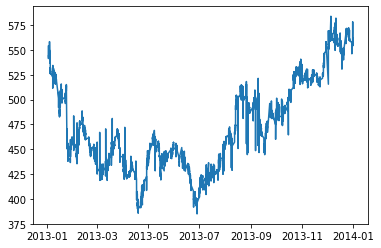

In [14]:
#11.
plt.plot(df['AvgPriceAAPL'])

In [15]:
#12.
start_date_train = '2013-01-02'
end_date_train = '2013-01-31'
start_date_test = '2013-02-01'
end_date_test = '2013-02-28'


In [16]:
#13.
Xtrain = df.loc[start_date_train:end_date_train,'RetAAPL0':'RetAAPL4'].values
ytrain = (df.loc[start_date_train:end_date_train,'RetAAPL5'].values >0 ).astype(int)

Xtest = df.loc[start_date_test:end_date_test,'RetAAPL0':'RetAAPL4'].values
ytest = (df.loc[start_date_test:end_date_test,'RetAAPL5'].values >0 ).astype(int)

In [35]:
Xtrain

array([[-2.16967157,  1.7662918 ,  0.04354966,  0.20586395,  0.33576484],
       [ 1.7662918 ,  0.04354966,  0.20586395,  0.33576484, -0.12447571],
       [ 0.04354966,  0.20586395,  0.33576484, -0.12447571, -0.04876859],
       ...,
       [ 0.01095398, -0.09309865, -0.03508156,  0.52750483, -0.16800305],
       [-0.09309865, -0.03508156,  0.52750483, -0.16800305,  5.69330463],
       [-0.03508156,  0.52750483, -0.16800305,  5.69330463, -5.28220345]])

In [17]:
#14.
model = GaussianNB()   
model.fit(Xtrain,ytrain)
y_model_NB = model.predict(Xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_model_NB)
#only 50% accuracy is not high enough

0.5028940638040114

In [18]:
#15.
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=10, gamma='auto')
model.fit(Xtrain,ytrain)
y_model_SVC = model.predict(Xtest)

accuracy_score(ytest,y_model_SVC)
#using SVC algorithm to fit the data has improved to 58% of accuracy

0.580966482702921

In [19]:
#16.
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50]}
grid = GridSearchCV(model, param_grid,cv = 5)
grid.fit(Xtrain, ytrain)
print(grid.best_params_)

{'C': 10}


In [20]:
#17.
from sklearn.ensemble import RandomForestClassifier
model_tree = RandomForestClassifier(n_estimators = 100, random_state=0)
model_tree.fit(Xtrain,ytrain)
y_model_tree = model_tree.predict(Xtest)

accuracy_score(ytest,y_model_tree)
#this model doesn't perform as good as SVC

0.54785300848028

In [21]:
#18.
RetNB = (y_model_NB*df.loc[start_date_test:end_date_test,'RetAAPL5'].values-(1-y_model_NB)*df.loc[start_date_test:end_date_test,'RetAAPL5'].values)
CsRetNB = (1+0.01*RetNB).cumprod()
CsRetNB

array([0.99992338, 1.00031741, 1.0016209 , ..., 1.02914025, 1.02885695,
       1.02931731])

In [40]:
y_model_NB*df.loc[start_date_test:end_date_test,'RetAAPL5'].values

array([-0.00766158, -0.        , -0.        , ..., -0.04471246,
       -0.02752767, -0.        ])

In [22]:
RetSVC = (y_model_SVC*df.loc[start_date_test:end_date_test,'RetAAPL5'].values-(1-y_model_SVC)*df.loc[start_date_test:end_date_test,'RetAAPL5'].values)
CsRetSVC = (1+0.01*RetSVC).cumprod()
CsRetSVC

array([0.99992338, 1.00031741, 0.99901391, ..., 6.16836922, 6.16667121,
       6.16391195])

In [23]:
RetRF = (y_model_tree*df.loc[start_date_test:end_date_test,'RetAAPL5'].values-(1-y_model_tree)*df.loc[start_date_test:end_date_test,'RetAAPL5'].values)
CsRetTree = (1+0.01*RetRF).cumprod()

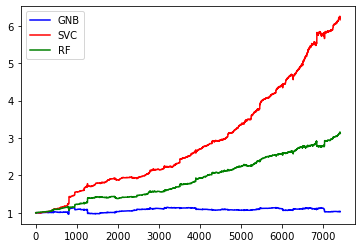

In [24]:
#19.
plt.plot(CsRetNB,color='blue',label='GNB')
plt.plot(CsRetSVC,color='red',label='SVC')
plt.plot(CsRetTree,color = 'green',label='RF')
plt.legend()

In [25]:
#20
null = df.loc[start_date_train:end_date_train,'BASprd':'BAImb'].values
Xtrain_new = np.concatenate((Xtrain,null),axis=1)
ytrain = (df.loc[start_date_train:end_date_train,'RetAAPL5'].values >0 ).astype(int)

nullt = df.loc[start_date_test:end_date_test,'BASprd':'BAImb'].values
Xtest_new = np.concatenate((Xtest,nullt),axis=1)
ytest = (df.loc[start_date_test:end_date_test,'RetAAPL5'].values >0 ).astype(int)

In [26]:
#20NB.
model = GaussianNB()   
model.fit(Xtrain_new,ytrain)
y_model_NBnew = model.predict(Xtest_new)
accuracy_score(ytest,y_model_NBnew)

0.5027594561852201

In [27]:
#20SVC
model = SVC(kernel='rbf', C=10, gamma='auto')
model.fit(Xtrain_new,ytrain)
y_model_SVCnew = model.predict(Xtest_new)

accuracy_score(ytest,y_model_SVCnew)

0.550275945618522

In [28]:
#20RF
model_tree.fit(Xtrain_new,ytrain)
y_model_treenew = model_tree.predict(Xtest_new)

accuracy_score(ytest,y_model_treenew)

0.552698882756764

In [29]:
RetNBnew = (y_model_NBnew*df.loc[start_date_test:end_date_test,'RetAAPL5'].values-(1-y_model_NBnew)*df.loc[start_date_test:end_date_test,'RetAAPL5'].values)
CsRetNBnew = (1+0.01*RetNBnew).cumprod()
CsRetNBnew

array([0.99992338, 1.00031741, 1.0016209 , ..., 1.03869202, 1.03840609,
       1.03887072])

In [30]:
RetSVCnew = (y_model_SVC*df.loc[start_date_test:end_date_test,'RetAAPL5'].values-(1-y_model_SVCnew)*df.loc[start_date_test:end_date_test,'RetAAPL5'].values)
CsRetSVCnew = (1+0.01*RetSVCnew).cumprod()
CsRetSVCnew

array([0.99992338, 1.00031741, 1.00031741, ..., 4.56621901, 4.56496204,
       4.56496204])

In [31]:
RetRFnew = (y_model_treenew*df.loc[start_date_test:end_date_test,'RetAAPL5'].values-(1-y_model_treenew)*df.loc[start_date_test:end_date_test,'RetAAPL5'].values)
CsRetTreenew = (1+0.01*RetRFnew).cumprod()
CsRetTreenew

array([0.99992338, 0.99952936, 0.99822689, ..., 4.37601168, 4.37480706,
       4.37284956])

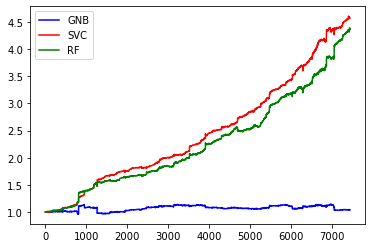

In [32]:
plt.plot(CsRetNBnew,color='blue',label='GNB')
plt.plot(CsRetSVCnew,color='red',label='SVC')
plt.plot(CsRetTreenew,color = 'green',label='RF')
plt.legend()

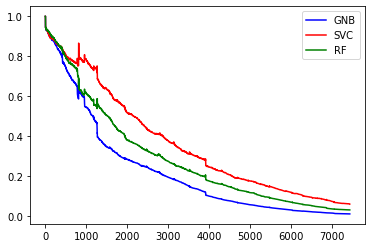

In [33]:
#21
RetNB = (y_model_NB*df.loc[start_date_test:end_date_test,'RetAAPL5'].values-(1-y_model_NB)*df.loc[start_date_test:end_date_test,'RetAAPL5'].values)
RetNBcost = RetNB - df.loc[start_date_test:end_date_test,'BASprd'].values
CsRetNBcost = (1+0.01*RetNBcost).cumprod()

RetSVC = (y_model_SVC*df.loc[start_date_test:end_date_test,'RetAAPL5'].values-(1-y_model_SVC)*df.loc[start_date_test:end_date_test,'RetAAPL5'].values)
RetSVCcost = RetSVC - df.loc[start_date_test:end_date_test,'BASprd'].values
CsRetSVCcost = (1+0.01*RetSVCcost).cumprod()

RetRF = (y_model_tree*df.loc[start_date_test:end_date_test,'RetAAPL5'].values-(1-y_model_tree)*df.loc[start_date_test:end_date_test,'RetAAPL5'].values)
RetRFcost = RetRF - df.loc[start_date_test:end_date_test,'BASprd'].values
CsRetRFcost = (1+0.01*RetRFcost).cumprod()

plt.plot(CsRetNBcost,color='blue',label='GNB')
plt.plot(CsRetSVCcost,color='red',label='SVC')
plt.plot(CsRetRFcost,color = 'green',label='RF')
plt.legend()

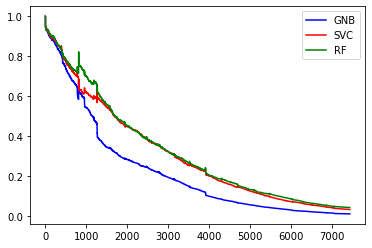

In [34]:
RetNBnew = (y_model_NBnew*df.loc[start_date_test:end_date_test,'RetAAPL5'].values-(1-y_model_NBnew)*df.loc[start_date_test:end_date_test,'RetAAPL5'].values)
RetNBcostnew = RetNBnew - df.loc[start_date_test:end_date_test,'BASprd'].values
CsRetNBcostnew = (1+0.01*RetNBcostnew).cumprod()

RetSVCnew = (y_model_SVCnew*df.loc[start_date_test:end_date_test,'RetAAPL5'].values-(1-y_model_SVCnew)*df.loc[start_date_test:end_date_test,'RetAAPL5'].values)
RetSVCcost = RetSVCnew - df.loc[start_date_test:end_date_test,'BASprd'].values
CsRetSVCcostnew = (1+0.01*RetSVCcost).cumprod()

RetRFnew = (y_model_treenew*df.loc[start_date_test:end_date_test,'RetAAPL5'].values-(1-y_model_treenew)*df.loc[start_date_test:end_date_test,'RetAAPL5'].values)
RetRFcostnew = RetRFnew - df.loc[start_date_test:end_date_test,'BASprd'].values
CsRetRFcostnew = (1+0.01*RetRFcostnew).cumprod()

plt.plot(CsRetNBcostnew,color='blue',label='GNB')
plt.plot(CsRetSVCcostnew,color='red',label='SVC')
plt.plot(CsRetRFcostnew,color = 'green',label='RF')
plt.legend()